<a href="https://colab.research.google.com/github/joebathelt/AUC_CogPsy/blob/main/week3_visual_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.8/204.8 kB 6.3 MB/s eta 0:00:00


### Visual Search

This experiment explores aspects of attention in a visual search task. It is a classic experiment that strikingly demonstrates the time required to direct attention to different regions of visual space. The fundamental premise is to ask participants to search a visual image for a particular item and to respond as quickly as possible once they locate it, or to respond as quickly as possible when they are certain the item is absent from the image. This type of experiment was used to develop Feature Integration Theory by Treisman and Gelade (1980).

Searches are divided into two types: those that require selective use of attention (serial search) and those that do not (parallel search). In the latter, the target item appears to pop out of the display. Particularly noteworthy is that this pop-out effect allows the participant to respond quickly even when the number of other items is increased. In serial search, it appears that the participant is obliged to examine each item individually (i.e. serially) until the target item is found. In such cases, the target item does not pop out and search time increases with the number of distractor items.

In the experiment below, the target is always a green circle. In the feature condition, the distractors are always blue squares. As you will see, the green circle appears to pop out of the image, which allows you to identify the target's location quickly. In the conjunctive condition, the distractor items are made more complex: some of the distractors are green squares whilst others are blue circles. Because some of the distractors share the target's colour, the green circle no longer pops out and you must search through all the items to find the one that is both green and a circle. This type of search is termed a conjunctive search because the target represents a conjunction, or combination, of features.

In [2]:
# This cell load the data. You don't need to change it or understand it. Just run the cell.
import pandas as pd

file_id = '1iJFULYCUymnU0LWCtuRI0XiP6hnOMUak'
url = f'https://docs.google.com/uc?export=download&id={file_id}'
df = pd.read_csv(url)

df.head()

,username,a_conj_16,a_conj_32,a_conj_4,a_conj_64,a_feat_16,a_feat_32,a_feat_4,a_feat_64,p_conj_16,p_conj_32,p_conj_4,p_conj_64,p_feat_16,p_feat_32,p_feat_4,p_feat_64
0,A01,1324.333333,1846.166667,756.333333,2580.333333,622.666667,486.000000,512.600000,560.666667,876.000000,1486.6,731.500000,1244.20,550.833333,527.000000,558.000000,492.166667
1,A02,1355.000000,2380.000000,1302.833333,2744.000000,929.833333,842.166667,782.400000,867.500000,1466.666667,1688.5,765.000000,1641.75,960.500000,898.166667,714.000000,940.333333
2,A03,2021.333333,2958.833333,988.666667,3667.800000,796.833333,808.333333,567.833333,680.666667,1033.500000,1846.5,823.166667,2218.50,567.166667,562.500000,600.833333,604.500000
3,A05,994.833333,1561.333333,814.333333,1590.333333,585.000000,637.333333,649.833333,621.833333,626.333333,1203.4,563.833333,920.50,484.000000,493.000000,468.500000,519.666667
4,A07,981.800000,1154.200000,668.333333,1479.166667,571.000000,471.400000,510.333333,551.000000,776.166667,814.0,571.800000,988.50,472.833333,455.500000,457.000000,420.600000


The output above shows the first few rows of the dataset. Each row represents the responses from a single participant. The columns indicate the different conditions. The columns starting with 'p' represent the trials where the target was present, and those starting with 'a' represent trials where the target was absent. The numbers at the end of each column name indicate the number of distractor items in the display (e.g., 'p_*_4' indicates trials where the target was present among 4 distractors). The middle part indicates if the search was feature based (**feat**) or conjunction based (**conj**). As a reminder, feature-based means that people looking for a target with unique features, where conjunction based means the target shares features with some distractors and only the combination of features is unique to the target. The values in the cells represent the average response times (in milliseconds) for each participant under each condition.

Our first goal is to see if the number of distractors affects response time differently in feature versus conjunction searches. Let's first see what this looks like for a single participant. Select your own username from the dropdown menu below to visualize your data.

In [5]:
# Run this cell and select your username from the from the dropdown menu.
import ipywidgets as widgets
from IPython.display import display

usernames = df['username'].values.tolist()
usernames.insert(0, 'Please select your username')

# Create dropdown
username_dropdown = widgets.Dropdown(
    options=usernames,
    description='Username:',
    style={'description_width': 'initial'}
)

# Display it
display(username_dropdown)

Dropdown(description='Username:', options=('Please select your username', 'A01', 'A02', 'A03', 'A05', 'A07', '…

In [6]:
if username_dropdown.value != 'Please select your username':
    selected_username = username_dropdown.value
    print(f'Using username: {selected_username}')
else:
    print('No username selected yet.')
    selected_username = usernames[1]
    print(f'Using default username: {selected_username}')

No username selected yet.
Using default username: A01


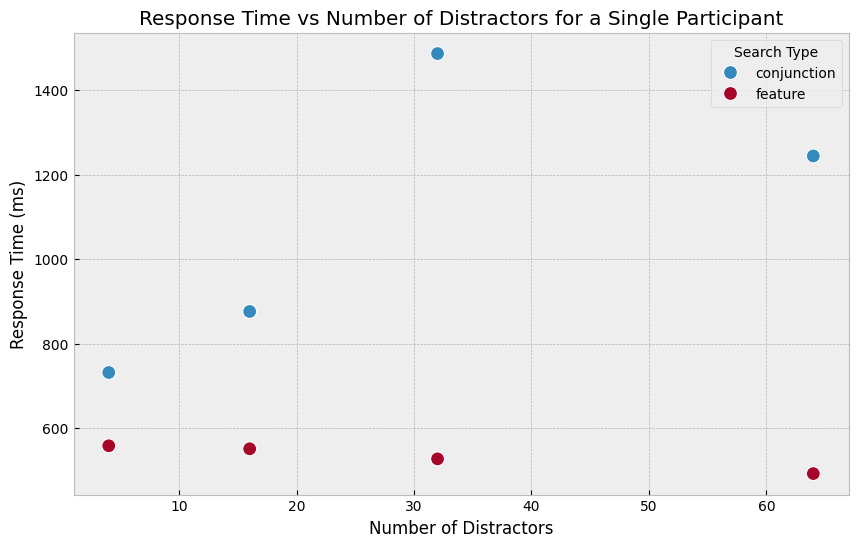

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Default settings
plt.style.use("bmh")

# Reshape the dataframe so that search type and num_distractors become separate columns
df_melted = df.melt(id_vars='username', var_name='condition', value_name='response_time')

# Extract all components from the condition column
df_melted[['presence', 'search_type', 'num_distractors']] = df_melted['condition'].str.split('_', expand=True)

# Convert num_distractors to integer
df_melted['num_distractors'] = df_melted['num_distractors'].astype(int)

# Making the labels more readable
df_melted['presence'] = df_melted['presence'].map({'p': 'present', 'a': 'absent'})
df_melted['search_type'] = df_melted['search_type'].map({'feat': 'feature', 'conj': 'conjunction'})

# Select one participant
df_participant = df_melted[df_melted['username'] == selected_username]

# Select only the target present trials
df_participant = df_participant[df_participant['presence'] == 'present']

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_participant,
    x='num_distractors',
    y='response_time',
    hue='search_type',
    s=100
)
plt.title('Response Time vs Number of Distractors for a Single Participant')
plt.xlabel('Number of Distractors')
plt.ylabel('Response Time (ms)')
plt.legend(title='Search Type')
plt.show()

It looks like for this participant, as the number of distractors increases, the response time for conjunction searches increases more steeply compared to feature searches. This suggests that conjunction searches are more affected by the number of distractors, likely because they require more focused attention to identify the target among similar items. We can characterise further by fitting a psychometric function, just like we did in the Müller-Lyer experiment. However, for that experiment we used **non-linear** fitting. Here, we're fitting straight lines to the relationship between set size and reaction time.

The `linregress` function finds the best-fitting line through your data points. The **slope** tells us how much reaction time increases for each additional item in the display.

In [8]:
# Fit a linear function to each condition for the selected participant
from scipy.stats import linregress
slopes = {}
for search_type in df_participant['search_type'].unique():
    subset = df_participant[df_participant['search_type'] == search_type]
    slope, intercept, r_value, p_value, std_err = linregress(subset['num_distractors'], subset['response_time'])
    slopes[search_type] = slope

for search_type, slope in slopes.items():
    print(f"Slope for {search_type} search: {slope:.2f} ms per distractor")

Slope for conjunction search: 9.04 ms per distractor
Slope for feature search: -1.14 ms per distractor


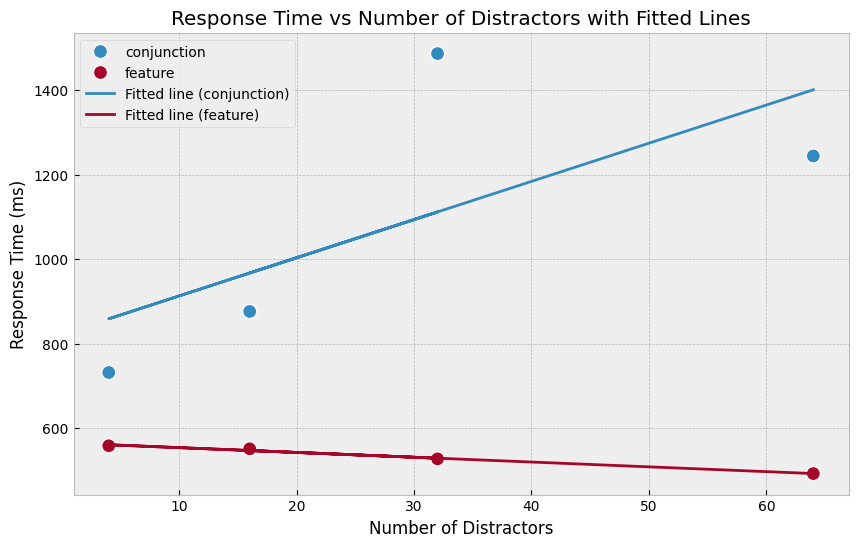

In [9]:
# Overlay the fitted lines on the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_participant,
    x='num_distractors',
    y='response_time',
    hue='search_type',
    s=100
)
for search_type in df_participant['search_type'].unique():
    subset = df_participant[df_participant['search_type'] == search_type]
    slope = slopes[search_type]
    intercept = subset['response_time'].mean() - slope * subset['num_distractors'].mean()
    x_vals = subset['num_distractors']
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, label=f'Fitted line ({search_type})')
plt.title('Response Time vs Number of Distractors with Fitted Lines')
plt.xlabel('Number of Distractors')
plt.ylabel('Response Time (ms)')
plt.legend()
plt.show()

<div style="background-color: #d1ecf1; border-left: 5px solid #0dcaf0; padding: 10px; margin: 10px 0;">
<strong>Insight</strong>: What do these different slope values tell us about the differences in between feature and conjunction searches?
</div>

Now that we have seen this pattern in a single participant, let's see if it holds across all participants. Complete the code cell below to calculate the slopes for all participants and plot the results.

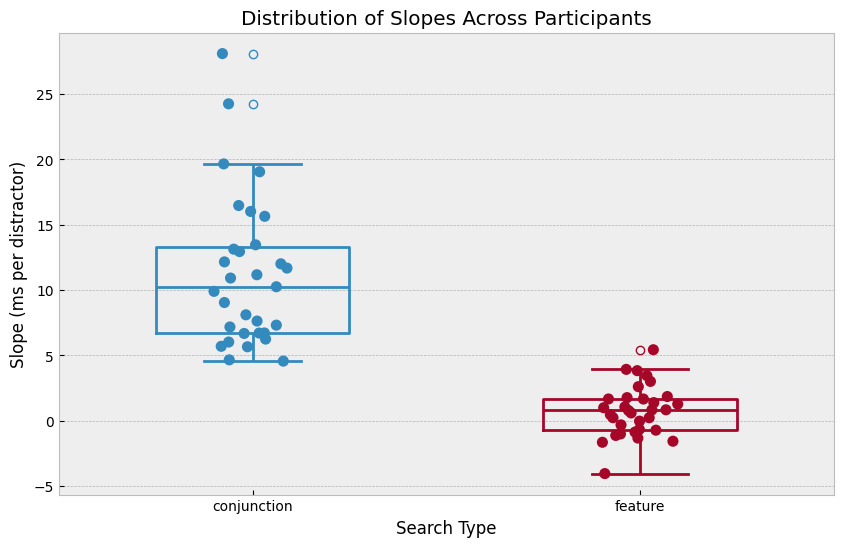

In [11]:
participants = df_melted['username'].unique()
all_slopes = []

for participant in #YOUR_CODE_HERE:
    df_participant = df_melted[(df_melted['username'] == participant) & (df_melted['presence'] == 'present')]
    for search_type in df_participant['search_type'].unique():
        subset = df_participant[df_participant['search_type'] == search_type]
        slope, intercept, r_value, p_value, std_err = linregress(subset['num_distractors'], subset['response_time'])
        all_slopes.append({'username': participant, 'search_type': search_type, 'slope': slope})

df_slopes = pd.DataFrame(all_slopes)

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_slopes,
    x='search_type',
    y='slope',
    hue='search_type',
    fill=None,
    width=0.5
)

sns.stripplot(
    data=df_slopes,
    x='search_type',
    y='slope',
    hue='search_type',
    s=8
)
plt.title('Distribution of Slopes Across Participants')
plt.xlabel('Search Type')
plt.ylabel('Slope (ms per distractor)')
plt.show()

So far, we only looked at trials where the target was present. However, in real-world searches, the target is often absent. How does this affect search times? Modify the code to include both target-present and target-absent trials in your analysis. What differences do you observe in the slopes for these two conditions across feature and conjunction searches?

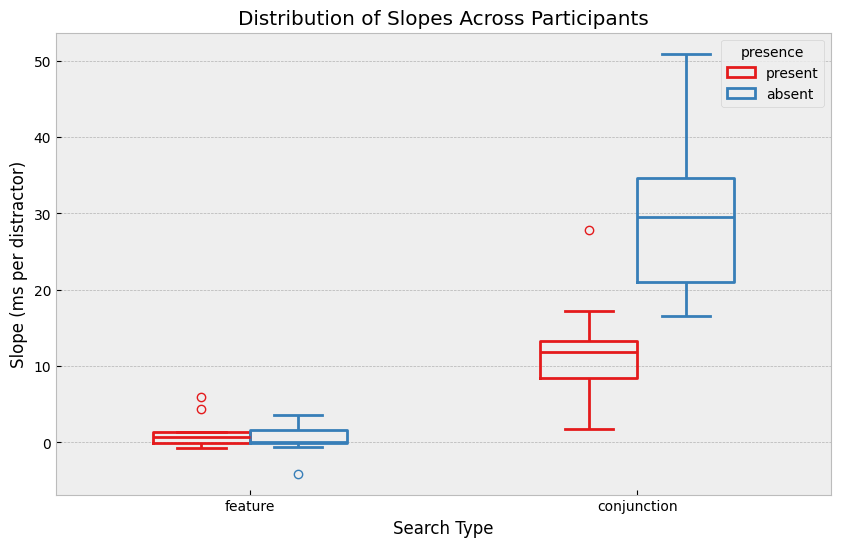

In [ ]:
participants = df_melted['username'].unique()
all_slopes = []

for participant in participants:
    df_participant = df_melted[(df_melted['username'] == participant)]
    for presence in df_participant['presence'].unique():
        df_presence = df_participant[df_participant['presence'] == presence]
        for search_type in df_presence['search_type'].unique():
            subset = df_presence[df_presence['search_type'] == search_type]
            slope, intercept, r_value, p_value, std_err = linregress(subset['num_distractors'], subset['response_time'])
            all_slopes.append({'username': participant, 'presence': presence, 'search_type': search_type, 'slope': slope})

df_slopes = pd.DataFrame(all_slopes)

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_slopes,
    x='search_type',
    y='slope',
    hue=#YOUR_CODE_HERE,
    fill=None,
    width=0.5,
    palette='Set1'
)

plt.title('Distribution of Slopes Across Participants')
plt.xlabel('Search Type')
plt.ylabel('Slope (ms per distractor)')
plt.show()

<div style="background-color: #d1ecf1; border-left: 5px solid #0dcaf0; padding: 10px; margin: 10px 0;">
<strong>Insight</strong>: Compare the slopes for target-present and target-absent conditions. How do these differences inform our understanding of visual search processes?
</div>

Let's compare the different conditions statistically to see if the differences in slopes are significant. We can use a two-way ANOVA to examine the effects of search type (feature vs. conjunction) and target presence (present vs. absent) on the slopes of response times.

In [ ]:
import pingouin as pg

# This says that we are predicting 'slope' (dv) from the two independent variables (between) 'search_type' and 'presence'
aov = pg.anova(dv='slope', between=['search_type', 'presence'], data=df_slopes, detailed=True)

# Print a ANOVA table with rounded p-values
print(aov.round(3))

                   Source        SS  DF        MS        F  p-unc    np2
0             search_type  6034.913   1  6034.913  152.373    0.0  0.731
1                presence  1232.910   1  1232.910   31.129    0.0  0.357
2  search_type * presence  1373.718   1  1373.718   34.685    0.0  0.382
3                Residual  2217.941  56    39.606      NaN    NaN    NaN


Now, what does this tell us? The significant main effect of search type indicates that, overall, the slopes differ between feature and conjunction searches. The significant main effect of presence suggests that, overall, the slopes differ between target-present and target-absent conditions. The significant interaction means that the difference in slopes between feature and conjunction searches depends on whether the target is present or absent. This supports the idea that conjunction searches are more affected by the number of distractors, especially when the target is present, which is consistent with theories of visual attention.

<div style="background-color: #d1ecf1; border-left: 5px solid #0dcaf0; padding: 10px; margin: 10px 0;">
<strong>Insight</strong>: Have a look at the graphs again in light of these statistical results. How do the statistical findings match up with the results that you observe in the plot?
</div>

Compare the average slope for **conjunction targets present** with the average slope for **conjunction targets absent**. What is the ratio between the two? Calculate the ratio by dividing one by the other.

In [ ]:
# YOUR CODE HERE

<div style="background-color: #d1ecf1; border-left: 5px solid #0dcaf0; padding: 10px; margin: 10px 0;">
<strong>Insight</strong>: The ratio should be close to 0.5 (or 2.0 if you divided the other way around). Can you think of a reason this would be the case?
</div>

### Reflection Questions
1. What do you think happened with trials where you responded incorrectly?
2. Can you think of any other analyses that might have been interesting?
3. Do you think you got better at the task during the experiment?
4. Halfway through the experiment, the task switched from feature search to conjunction search. Do you remember this switch? Do you think this halfway switch could be a problem for our interpretation of the results? If so, what could be done to fix it?
5. Are there any other aspects of the experiment that could be improved?


**Well done! Your reached the end of this notebook**

That's it for the Visual Search experiment! You should now have a good understanding of how to analyse data with different conditions, fit linear models to reaction time data, and interpret the results in the context of cognitive psychology theories. If you have any questions or need further clarification on any part of the analysis, feel free to ask!